In [1]:
# K-Means Clustering

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

#sample data
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# apply K-means Clustering
Kmeans = KMeans(n_clusters = 2)
labels = Kmeans.fit_predict(X)
print(labels)

#calculate silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score: ", score)



[1 1 1 0 0 0]
Silhouette Score:  0.7133477791749615


In [2]:
%pip install scikit-learn-extra

In [3]:
%pip install "numpy<2"

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving mall_customers.csv to mall_customers (1).csv
{'mall_customers (1).csv': b'"customer_id","gender","age","annual_income","spending_score"\n1,"Male",19,15,39\n2,"Male",21,15,81\n3,"Female",20,16,6\n4,"Female",23,16,77\n5,"Female",31,17,40\n6,"Female",22,17,76\n7,"Female",35,18,6\n8,"Female",23,18,94\n9,"Male",64,19,3\n10,"Female",30,19,72\n11,"Male",67,19,14\n12,"Female",35,19,99\n13,"Female",58,20,15\n14,"Female",24,20,77\n15,"Male",37,20,13\n16,"Male",22,20,79\n17,"Female",35,21,35\n18,"Male",20,21,66\n19,"Male",52,23,29\n20,"Female",35,23,98\n21,"Male",35,24,35\n22,"Male",25,24,73\n23,"Female",46,25,5\n24,"Male",31,25,73\n25,"Female",54,28,14\n26,"Male",29,28,82\n27,"Female",45,28,32\n28,"Male",35,28,61\n29,"Female",40,29,31\n30,"Female",23,29,87\n31,"Male",60,30,4\n32,"Female",21,30,73\n33,"Male",53,33,4\n34,"Male",18,33,92\n35,"Female",49,33,14\n36,"Female",21,33,81\n37,"Female",42,34,17\n38,"Female",30,34,73\n39,"Female",36,37,26\n40,"Female",20,37,75\n41,"Female",65,38,35\n4

In [12]:
df = pd.read_csv('mall_customers.csv')
print(df)
display(df.head())

#select relevant features
x = df[['age', 'annual_income', 'spending_score']]

#Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


     customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


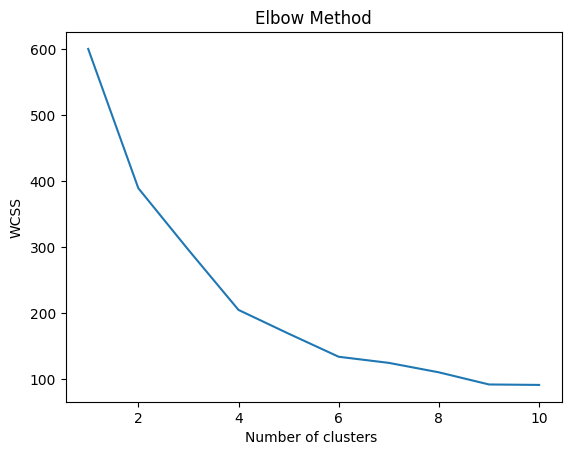

In [14]:
# Apply K-Means
# Determine optimal number of clusters (K) using Elbow Method
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

# Plot WCSS curve to find optimal k
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters ')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [16]:
#apply K-means clustering with optimal K
Kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(x_scaled)

# Apply K-mediods clustering with optmal K
kmedoids = KMedoids(n_clusters=5)
kmedoids_labels = kmedoids.fit_predict(x_scaled)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

Text(0.5, 1.0, 'K-Medoids Clustering')

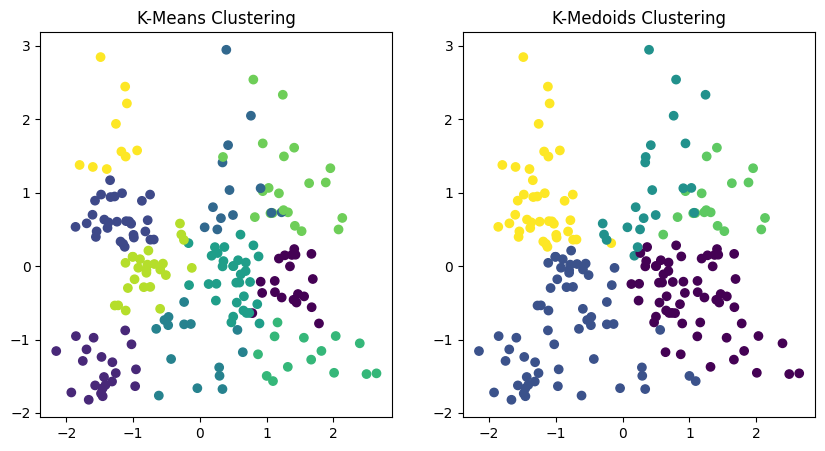

In [17]:
#plot clusters

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')

plt.subplot(1,2,2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmedoids_labels)
plt.title('K-Medoids Clustering')

In [18]:
# Evaluate Clustering quality using silhouette Score
kmeans_silhouette = silhouette_score(x_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(x_scaled, kmedoids_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'K-Medoids Silhouette Score: "{kmeans_silhouette}')


K-Means Silhouette Score: 0.3952805777021052
K-Medoids Silhouette Score: "0.3952805777021052
